In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ace-class-assignment/Test.csv
/kaggle/input/ace-class-assignment/AMP_TrainSet.csv


In [28]:
#Set path of the file to read.
TrainSet_path = '/kaggle/input/ace-class-assignment/AMP_TrainSet.csv'

In [29]:
#Read the file into a variable TrainSet_data
TrainSet_data = pd.read_csv(TrainSet_path)

In [30]:
#List all columns in the dataset from which to choose variables for modeling
TrainSet_data.columns

Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104',
       'CLASS'],
      dtype='object')

In [31]:

#Need to perform feature selection (also called dimensionality reduction) to choose only the “relevant” variables. Let's use a simple measure called the Correlation Coefficient to determine the most useful variables for predicting class
#To select a limited number of variables, we can find those that have the greatest correlation (either negative or positive) with the class. 

# Find correlations and sort
TrainSet_data.corr()['CLASS'].sort_values()

FULL_AcidicMolPerc   -0.598816
FULL_AURR980107      -0.584111
FULL_DAYM780201      -0.554838
FULL_OOBM850104      -0.453287
AS_DAYM780201        -0.437168
FULL_GEOR030101      -0.260470
AS_FUKS010112         0.033432
NT_EFC195             0.260702
CT_RACS820104         0.267652
FULL_Charge           0.534602
AS_MeanAmphiMoment    0.693552
CLASS                 1.000000
Name: CLASS, dtype: float64

In [32]:
most_correlated = TrainSet_data.corr().abs()['CLASS'].sort_values(ascending=False)
most_correlated

CLASS                 1.000000
AS_MeanAmphiMoment    0.693552
FULL_AcidicMolPerc    0.598816
FULL_AURR980107       0.584111
FULL_DAYM780201       0.554838
FULL_Charge           0.534602
FULL_OOBM850104       0.453287
AS_DAYM780201         0.437168
CT_RACS820104         0.267652
NT_EFC195             0.260702
FULL_GEOR030101       0.260470
AS_FUKS010112         0.033432
Name: CLASS, dtype: float64

In [33]:
#Maintain the top 8 most correlation features with CLASS
most_correlated = most_correlated[:8]

In [34]:
most_correlated

CLASS                 1.000000
AS_MeanAmphiMoment    0.693552
FULL_AcidicMolPerc    0.598816
FULL_AURR980107       0.584111
FULL_DAYM780201       0.554838
FULL_Charge           0.534602
FULL_OOBM850104       0.453287
AS_DAYM780201         0.437168
Name: CLASS, dtype: float64

In [35]:
X = TrainSet_data.ix[:, most_correlated.index]
X.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,CLASS,AS_MeanAmphiMoment,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_Charge,FULL_OOBM850104,AS_DAYM780201
0,1,0.282,0.000,0.951,74.842,5.0,-3.663,73.444
1,1,0.600,5.405,0.931,71.595,4.0,-4.011,68.222
2,1,0.593,5.405,0.873,73.595,5.5,-2.512,69.444
3,1,0.614,4.167,0.895,66.250,5.0,-1.362,67.222
4,1,0.616,8.537,0.932,64.720,7.5,-2.091,72.944


In [36]:
#Use the dot notation to select the column to predict <Prediction Target>. Call it y
y = TrainSet_data.CLASS

In [37]:
#Import train_test_split from  scikit-learn library
from sklearn.model_selection import train_test_split

In [38]:
#Split into training/testing sets with 25% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [39]:

X_train.head()

,CLASS,AS_MeanAmphiMoment,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_Charge,FULL_OOBM850104,AS_DAYM780201
1483,1,34.060,4.511,0.936,77.188,15.5,-0.725,76.222
1621,0,1.398,9.756,1.000,73.780,0.0,-1.180,72.111
569,1,21.323,0.000,0.721,58.381,2.0,-4.678,62.056
1307,1,33.724,0.000,0.845,68.294,1.0,-4.961,68.294
2152,0,6.596,6.250,1.059,76.375,0.5,-3.689,76.375


In [40]:
 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

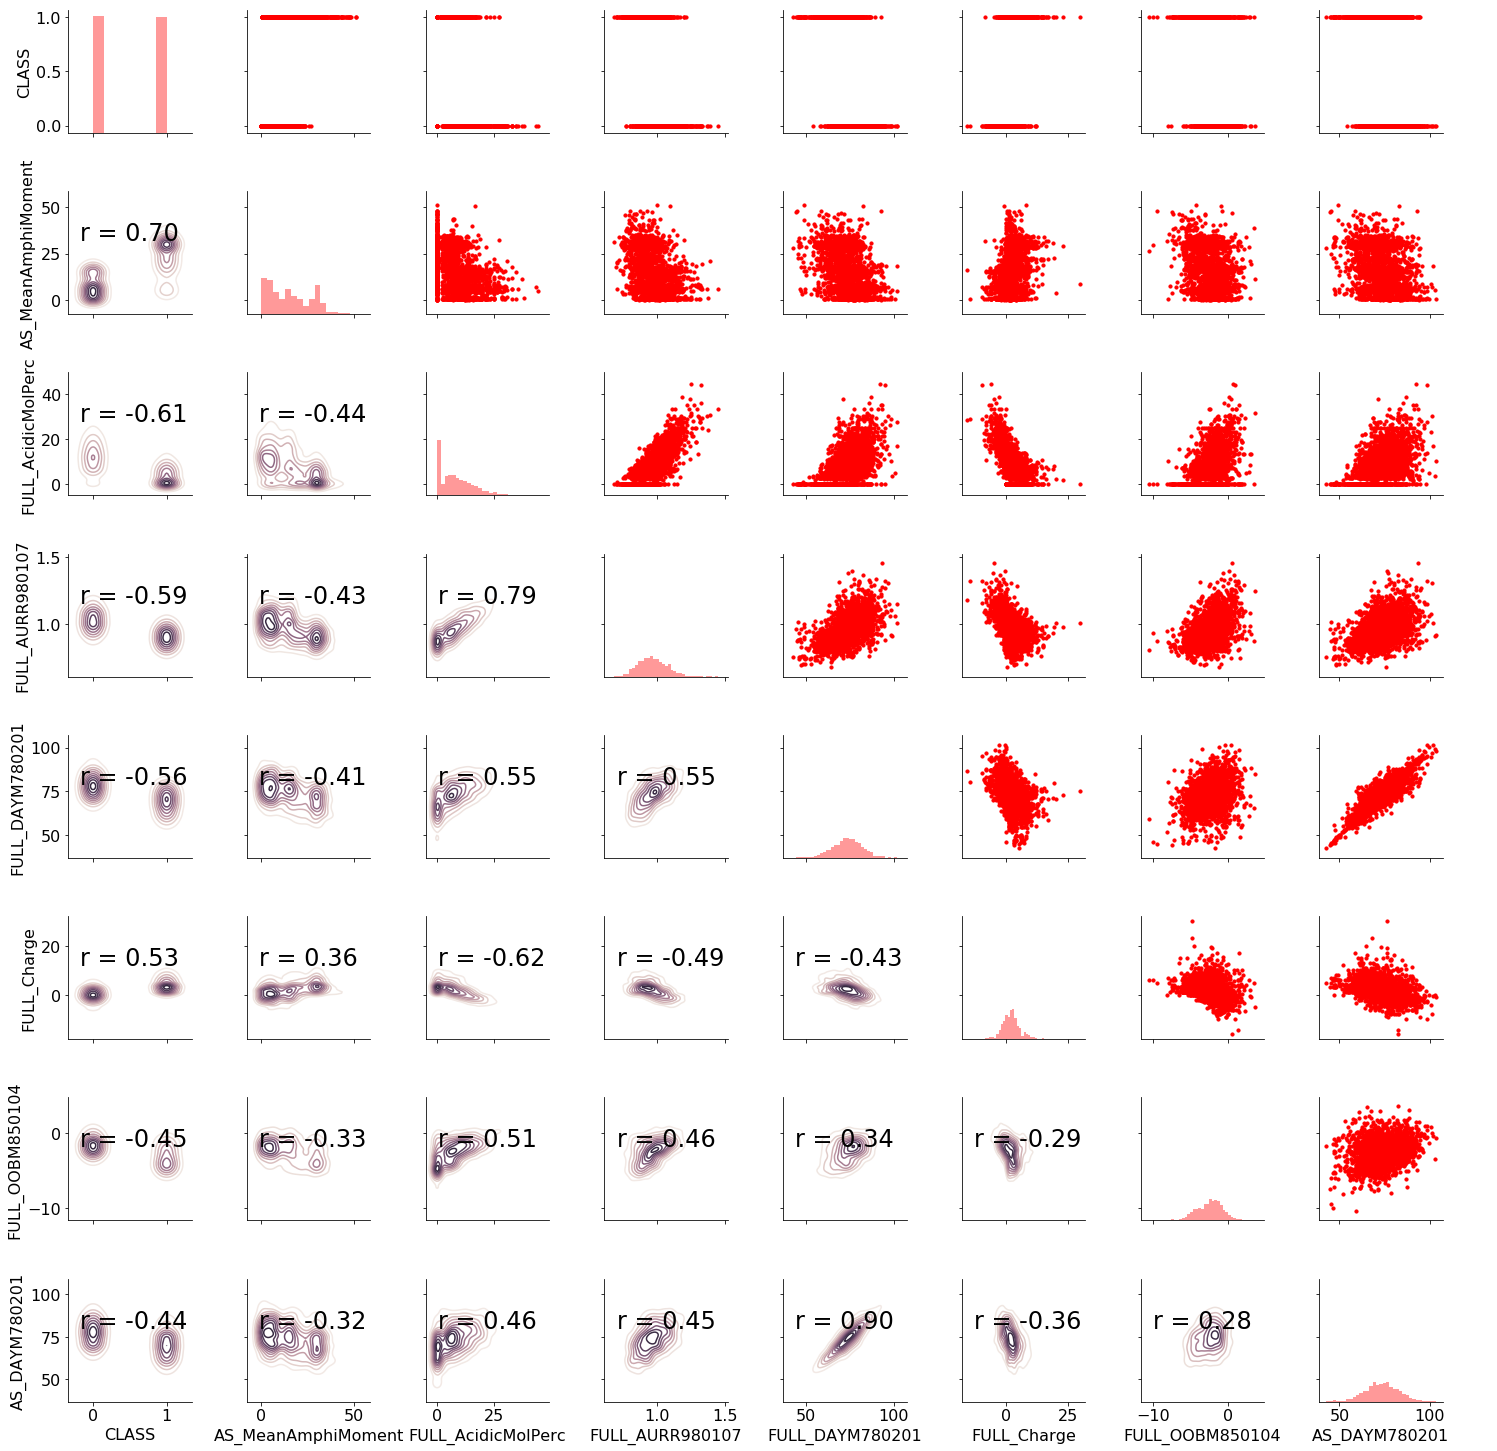

In [41]:
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(X_train)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [42]:
# Naive baseline is the median
median_pred = X_train['CLASS'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['CLASS']

In [43]:
true

6       1
1159    1
1854    0
2282    0
825     1
       ..
425     1
1074    1
1610    0
241     1
943     1
Name: CLASS, Length: 760, dtype: int64

In [44]:
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error


In [45]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [46]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 0.5092
Median Baseline RMSE: 0.7136


In [47]:

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [48]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='CLASS')
    X_test = X_test.drop(columns='CLASS')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.ix[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.ix['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [52]:
results = evaluate(X_train, X_test, y_train, y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: 
.ix is deprecated. Please us

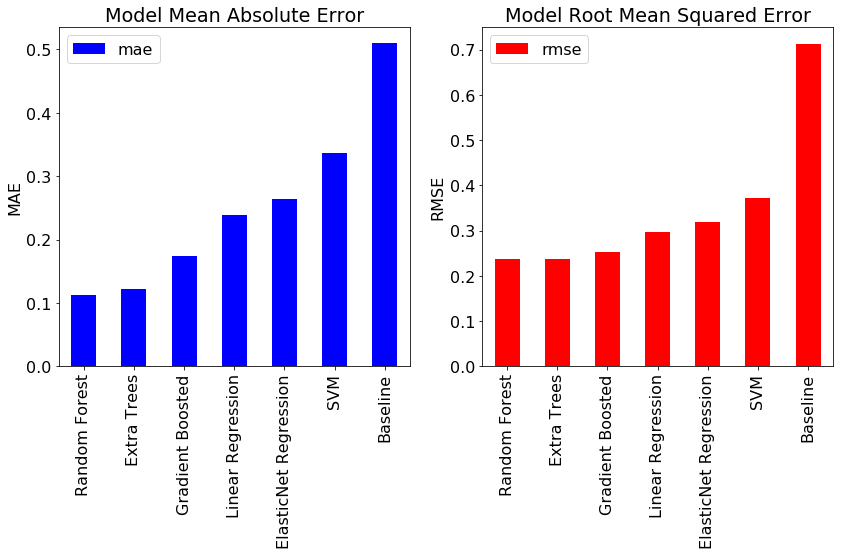

In [53]:
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [56]:
print('The Random Forest regressor is {:0.2f}% better than the baseline.'.format(
    (100 * abs(results.loc['Random Forest', 'mae'] - results.loc['Baseline', 'mae'])) / results.loc['Baseline', 'mae']))

The Random Forest regressor is 77.98% better than the baseline.
